In [683]:
import pandas as pd
from sklearn.model_selection import train_test_split
import xgboost as xgb
import matplotlib.pyplot as plt
import json
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.inspection import permutation_importance
from sklearn.metrics import mean_squared_error, accuracy_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
house_file = pd.read_csv('../data/cleaned_complete.csv').drop(['Unnamed: 0.1','Unnamed: 0', 'index','dateUpdated','dateListed','geoLocation','geometry', 'index_right', 'SA2_maincode_2021','Population Increase','Earners (persons)','Median age of earners (years)','Male','Female','Person','Male Ratio','Female Ratio','Sum ($)','Mean ($)','Median ($)','propertyTypes','price'],axis = 1)

In [684]:
house_file_2 = pd.read_csv("../data/cleaned_complete_2.csv").drop(['Unnamed: 0','level_0','dateUpdated','dateListed','geoLocation','geometry', 'index_right', 'SA2_maincode_2021','Population Increase','Earners (persons)','Median age of earners (years)','Male','Female','Person','Male Ratio','Female Ratio','Sum ($)','Mean ($)','Median ($)','propertyTypes','price'],axis = 1)
house_file_2

,bathrooms,bedrooms,carspaces,landAreaSqm,postcode,surburb,year,month,bond,rent,...,place_of_worship,school,university,garden,park,playground,pitch,offence count,incidents recorded,Population
0,1.0,3.0,1.0,NaN,3747,beechworth,2019,2,NaN,320.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1553,1145,4868.000000
1,1.0,3.0,0.0,NaN,3747,beechworth,2020,3,1473.0,340.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1553,1145,4930.000000
2,1.0,4.0,1.0,NaN,3747,beechworth,2019,11,NaN,360.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1553,1145,4868.000000
3,1.0,3.0,1.0,NaN,3747,beechworth,2020,5,NaN,350.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1553,1145,4930.000000
4,1.0,2.0,0.0,NaN,3747,beechworth,2019,11,NaN,285.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1553,1145,4868.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6582,1.0,3.0,2.0,NaN,3956,dumbalk,2022,8,NaN,350.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1258,1022,9476.138909
6583,2.0,4.0,2.0,NaN,3956,dumbalk,2022,9,NaN,485.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1258,1022,9476.138909
6584,1.0,3.0,0.0,NaN,3956,dumbalk,2022,9,NaN,370.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1258,1022,9476.138909
6585,1.0,3.0,3.0,NaN,3956,dumbalk,2022,9,NaN,390.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1258,1022,9476.138909


In [685]:
house_file = pd.concat([house_file, house_file_2]).reset_index().drop('index', axis =1)
house_file

,bathrooms,bedrooms,carspaces,landAreaSqm,postcode,surburb,year,month,bond,rent,...,place_of_worship,school,university,garden,park,playground,pitch,offence count,incidents recorded,Population
0,1.0,1.0,0.0,NaN,3205,south melbourne,2019,1,NaN,360.0,...,6.0,1.0,0.0,8.0,16.0,10.0,5.0,22895.0,17201.0,12753.000000
1,2.0,2.0,1.0,NaN,3205,south melbourne,2019,1,NaN,725.0,...,6.0,1.0,0.0,8.0,16.0,10.0,5.0,22895.0,17201.0,12753.000000
2,1.0,2.0,0.0,NaN,3205,south melbourne,2019,1,NaN,500.0,...,6.0,1.0,0.0,8.0,16.0,10.0,5.0,22895.0,17201.0,12753.000000
3,1.0,3.0,0.0,NaN,3205,south melbourne,2019,1,NaN,795.0,...,6.0,1.0,0.0,8.0,16.0,10.0,5.0,22895.0,17201.0,12753.000000
4,2.0,2.0,0.0,NaN,3205,south melbourne,2019,1,NaN,825.0,...,6.0,1.0,0.0,8.0,16.0,10.0,5.0,22895.0,17201.0,12753.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107221,1.0,3.0,2.0,NaN,3956,dumbalk,2022,8,NaN,350.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1258.0,1022.0,9476.138909
107222,2.0,4.0,2.0,NaN,3956,dumbalk,2022,9,NaN,485.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1258.0,1022.0,9476.138909
107223,1.0,3.0,0.0,NaN,3956,dumbalk,2022,9,NaN,370.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1258.0,1022.0,9476.138909
107224,1.0,3.0,3.0,NaN,3956,dumbalk,2022,9,NaN,390.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1258.0,1022.0,9476.138909


In [686]:
income = pd.read_excel('../data/Income.xlsx',sheet_name="Forecasted Income", header=[0,1]).drop([(           'Unnamed: 0_level_0',      'SA2')], axis = 1)
income[(           'Unnamed: 2_level_0', 'Postcode')] = income[(           'Unnamed: 2_level_0', 'Postcode')].fillna(0)

In [687]:
name_income_dict = dict()
postcode_income_dict = dict()
for index, item in income.iterrows():
    name = item[(           'Unnamed: 1_level_0', 'SA2 NAME')].lower().replace('- ','')
    postcode_income = int(item[(           'Unnamed: 2_level_0', 'Postcode')])
    name_income_dict[name] = item
    postcode_income_dict[postcode_income] = item

def search_income(suburb_name,postcode):
    item = name_income_dict.get(suburb_name)
    if item is not None:
        return item
    item = postcode_income_dict.get(postcode)
    if item is not None:
        return item    
    return None


In [688]:
income_list = []
l = []
col = None
for index, value in house_file.iterrows():
    item = search_income(value['surburb'], value['postcode'])
    if item is not None:
        l.append(list(item))
        col = item.index
    else:
        l.append([None]*len(col))

In [689]:
income = pd.DataFrame(l, columns=['SA2 NAME','Postcode','Earners_2019','Earners_2020','Earners_2021','Earners_2022','Median_age_2019','Median_age_2020','Median_age_2021','Median_age_2022','sum_2019','sum_2020','sum_2021','sum_2022','median_2019','median_2020','median_2021','median_2022','mean_2019','mean_2020','mean_2021','mean_2022'])
house_original = pd.concat([house_file, income],axis=1)

In [690]:
# house = house_original.fillna(0)
value_list = []
for index, values in house_original.iterrows():
    year = values['year']
    column_list = list(values.index)[:44]
    for i in list(values.index)[44:]:
        if str(year) in i:
            column_list.append(i)
    new_value = values[column_list]
    value_list.append(list(new_value))
file = pd.DataFrame(value_list, columns = column_list).rename({'Earners_2021':'Earners', 'Median_age_2021':'Median_age', 'sum_2021':'sum', 'median_2021':'median',	'mean_2021':'mean'}, axis = 1)

In [ ]:
file

,bathrooms,bedrooms,carspaces,landAreaSqm,postcode,surburb,year,month,bond,rent,...,offence count,incidents recorded,Population,SA2 NAME,Postcode,Earners_2019,Median_age_2019,sum_2019,median_2019,mean_2019
0,1.0,1.0,0.0,NaN,3205,south melbourne,2019,1,NaN,360.0,...,22895.0,17201.0,12753.000000,South Melbourne,3004.0,9313.509189,38.256757,8.887474e+08,66259.675774,95462.489940
1,2.0,2.0,1.0,NaN,3205,south melbourne,2019,1,NaN,725.0,...,22895.0,17201.0,12753.000000,South Melbourne,3004.0,9313.509189,38.256757,8.887474e+08,66259.675774,95462.489940
2,1.0,2.0,0.0,NaN,3205,south melbourne,2019,1,NaN,500.0,...,22895.0,17201.0,12753.000000,South Melbourne,3004.0,9313.509189,38.256757,8.887474e+08,66259.675774,95462.489940
3,1.0,3.0,0.0,NaN,3205,south melbourne,2019,1,NaN,795.0,...,22895.0,17201.0,12753.000000,South Melbourne,3004.0,9313.509189,38.256757,8.887474e+08,66259.675774,95462.489940
4,2.0,2.0,0.0,NaN,3205,south melbourne,2019,1,NaN,825.0,...,22895.0,17201.0,12753.000000,South Melbourne,3004.0,9313.509189,38.256757,8.887474e+08,66259.675774,95462.489940
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107221,1.0,3.0,2.0,NaN,3956,dumbalk,2022,8,NaN,350.0,...,1258.0,1022.0,9476.138909,None,NaN,NaN,NaN,NaN,NaN,NaN
107222,2.0,4.0,2.0,NaN,3956,dumbalk,2022,9,NaN,485.0,...,1258.0,1022.0,9476.138909,None,NaN,NaN,NaN,NaN,NaN,NaN
107223,1.0,3.0,0.0,NaN,3956,dumbalk,2022,9,NaN,370.0,...,1258.0,1022.0,9476.138909,None,NaN,NaN,NaN,NaN,NaN,NaN
107224,1.0,3.0,3.0,NaN,3956,dumbalk,2022,9,NaN,390.0,...,1258.0,1022.0,9476.138909,None,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
column_list = list(file.columns)
column_list.pop(9)
column_list.pop(5)
column_list.pop(-7)

'SA2 NAME'

In [ ]:
features = file[column_list]
target = file['rent']

In [609]:
X_full, y_full = features,target
n_samples = X_full.shape[0] 
n_features = X_full.shape[1] 
print(n_samples)
print(n_features)
 
rng = np.random.RandomState(0)
missing_rate = 0.5
n_missing_samples = int(np.floor(n_samples * n_features *missing_rate))
 
X_missing_reg = X_full.copy()

missing = X_missing_reg .isna().sum()
missing = pd.DataFrame(data={'feature': missing.index,'missing_values':missing.values})

missing = missing[~missing['missing_values'].isin([0])]

missing['missing_rate'] =  missing['missing_values']/X_missing_reg .shape[0]
X_df = X_missing_reg.isnull().sum()

colname = X_df[~X_df.isin([0])].sort_values().index.values

sortindex = []
for i in colname:
    sortindex.append(X_missing_reg.columns.tolist().index(str(i)))

for i in sortindex:

    df = X_missing_reg 
    fillc = df.iloc[:, i] 
    df = pd.concat([df.drop(df.columns[i], axis=1), pd.DataFrame(y_full)], axis=1)
    df_0 = SimpleImputer(missing_values=np.nan, strategy='constant', fill_value=0).fit_transform(df)

    Ytrain = fillc[fillc.notnull()]  
    Ytest = fillc[fillc.isnull()] 

    Xtrain = df_0[Ytrain.index, :]
    Xtest = df_0[Ytest.index, :] 
    rfc = RandomForestRegressor(n_estimators=100)  
    rfc = rfc.fit(Xtrain, Ytrain)  
    Ypredict = rfc.predict(Xtest) 

    X_missing_reg.loc[X_missing_reg.iloc[:, i].isnull(), X_missing_reg.columns[i]] = Ypredict

108831
46


In [610]:
new_data = X_missing_reg
new_data.to_csv('../data/curated/join.csv')

In [680]:
new_data = file
new_data['surburb'].value_counts()

melbourne         10319
docklands          4256
southbank          3138
south yarra        2598
port melbourne     1989
                  ...  
heyfield              1
sailors gully         1
portland north        1
dutson                1
heathcote             1
Name: surburb, Length: 946, dtype: int64

In [612]:
new_data['year'] = house_file['year'] 
new_data['month'] = house_file['month'] 
new_data = new_data.drop(['Unnamed: 0'],axis=1)

In [633]:
new_data['rent'] = house_file['rent']

In [666]:
median_price = new_data.groupby(['bathrooms', 'bedrooms', 'carspaces','year','postcode'],as_index = False)['rent'].median('rent')
median_rent = dict()
for index, values in median_price.iterrows():
    year = values['year']
    bathrooms = values['bathrooms']
    bedrooms = values['bedrooms']
    carspaces = values['carspaces']
    postcode = values['postcode']
    key = postcode+year+bathrooms+bedrooms+carspaces
    median_rent[key] = values['rent']
values_list = []
for item,values in new_data.iterrows():
    year = values['year']
    bathrooms = values['bathrooms']
    bedrooms = values['bedrooms']
    carspaces = values['carspaces']
    postcode = values['postcode']
    key = postcode+year+bathrooms+bedrooms+carspaces
    hit = median_rent[key]
    values_list.append(hit)
new_data['median_rent'] = values_list 
# house_file = house_file[house_file['rent'] <= 1.5 * house_file['median_rent']]
new_data = new_data[new_data['rent'] > 0.1 * new_data['median_rent']]

In [667]:
new_data

,bathrooms,bedrooms,carspaces,landAreaSqm,postcode,surburb,year,month,bond,rent,...,incidents recorded,Population,SA2 NAME,Postcode,Earners_2019,Median_age_2019,sum_2019,median_2019,mean_2019,median_rent
0,1.0,1.0,0.0,NaN,3205,south melbourne,2019,1,NaN,360.0,...,17201.0,12753.000000,South Melbourne,3004.0,9313.509189,38.256757,8.887474e+08,66259.675774,95462.489940,790.0
1,2.0,2.0,1.0,NaN,3205,south melbourne,2019,1,NaN,725.0,...,17201.0,12753.000000,South Melbourne,3004.0,9313.509189,38.256757,8.887474e+08,66259.675774,95462.489940,565.0
2,1.0,2.0,0.0,NaN,3205,south melbourne,2019,1,NaN,500.0,...,17201.0,12753.000000,South Melbourne,3004.0,9313.509189,38.256757,8.887474e+08,66259.675774,95462.489940,570.0
3,1.0,3.0,0.0,NaN,3205,south melbourne,2019,1,NaN,795.0,...,17201.0,12753.000000,South Melbourne,3004.0,9313.509189,38.256757,8.887474e+08,66259.675774,95462.489940,580.0
4,2.0,2.0,0.0,NaN,3205,south melbourne,2019,1,NaN,825.0,...,17201.0,12753.000000,South Melbourne,3004.0,9313.509189,38.256757,8.887474e+08,66259.675774,95462.489940,580.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107221,1.0,3.0,2.0,NaN,3956,dumbalk,2022,8,NaN,350.0,...,1022.0,9476.138909,None,NaN,NaN,NaN,NaN,NaN,NaN,350.0
107222,2.0,4.0,2.0,NaN,3956,dumbalk,2022,9,NaN,485.0,...,1022.0,9476.138909,None,NaN,NaN,NaN,NaN,NaN,NaN,485.0
107223,1.0,3.0,0.0,NaN,3956,dumbalk,2022,9,NaN,370.0,...,1022.0,9476.138909,None,NaN,NaN,NaN,NaN,NaN,NaN,370.0
107224,1.0,3.0,3.0,NaN,3956,dumbalk,2022,9,NaN,390.0,...,1022.0,9476.138909,None,NaN,NaN,NaN,NaN,NaN,NaN,390.0


In [668]:
house_count = pd.DataFrame(house_file['postcode'].value_counts()).reset_index().rename({"index":"postcode",'postcode':'count'},axis = 1)
house_count

,postcode,count
0,3000,8990
1,3008,4256
2,3006,3151
3,3029,3099
4,3030,2724
...,...,...
498,3728,1
499,3114,1
500,3390,1
501,3388,1


In [669]:
df = new_data.groupby(['bathrooms','bedrooms','carspaces','postcode','year','month'],as_index= False).mean(['rent','distance of the closest bus stop','distance of the closest train stop','distance of the closest tram stop','distance of the closest vline stop','distance of the closest school','distance to the closest shopping mall']).drop(['landAreaSqm','longitude','latitude','median_rent','Postcode'],axis = 1)
df["postcode"] = df["postcode"].apply(lambda x: int(x))
df

,bathrooms,bedrooms,carspaces,postcode,year,month,bond,rent,distance of the closest bus stop,count of bus stop,...,playground,pitch,offence count,incidents recorded,Population,Earners_2019,Median_age_2019,sum_2019,median_2019,mean_2019
0,0.0,1.0,0.0,3008,2019,12,5100.0,850.0,0.456268,5.0,...,0.0,0.0,25125.0,18185.0,16375.000000,12852.879346,32.000000,9.131559e+08,55302.312878,71162.931348
1,0.0,1.0,0.0,3015,2019,10,1084.0,250.0,0.370457,60.0,...,26.0,40.0,10604.0,8777.0,19243.000000,11895.330882,41.000000,1.028750e+09,72539.966775,86488.843304
2,0.0,1.0,0.0,3053,2022,5,0.0,175.0,0.449442,39.0,...,8.0,24.0,20238.0,15867.0,16701.220181,11346.820188,29.126605,7.687387e+08,39659.346275,64056.803616
3,0.0,1.0,0.0,3079,2022,3,1304.0,300.0,0.516233,48.0,...,14.0,42.0,9248.0,7527.0,12678.988491,9162.593440,41.054886,9.836557e+08,71134.720489,104102.687648
4,0.0,1.0,0.0,3171,2020,2,5000.0,460.0,0.642444,64.0,...,4.0,12.0,22113.0,16777.0,23636.000000,13687.192327,34.379807,6.136552e+08,39079.025392,44830.558563
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47169,4.0,5.0,4.0,3913,2019,1,NaN,800.0,0.781673,9.0,...,0.0,5.0,1718.0,1299.0,18825.000000,NaN,NaN,NaN,NaN,NaN
47170,4.0,6.0,2.0,3030,2019,11,NaN,600.0,0.089433,232.0,...,85.0,183.0,65203.0,49527.0,17871.000000,NaN,NaN,NaN,NaN,NaN
47171,4.0,6.0,2.0,3106,2019,3,NaN,700.0,0.587239,71.0,...,7.0,5.0,4770.0,3525.0,17658.000000,10974.529072,49.255208,8.974782e+08,50540.950494,81769.467463
47172,4.0,6.0,4.0,3976,2019,10,NaN,520.0,0.743108,73.0,...,5.0,6.0,15410.0,11362.0,13452.000000,13840.343886,37.756410,6.993963e+08,48450.732834,50531.830163


In [670]:
df2 = new_data.groupby(['bathrooms','bedrooms','carspaces','postcode'],as_index= False).mean(['rent','distance of the closest bus stop','distance of the closest train stop','distance of the closest tram stop','distance of the closest vline stop','distance of the closest school','distance to the closest shopping mall']).drop(['landAreaSqm','longitude', 'latitude','year','month','Population ','Postcode','median_rent'],axis = 1)
df2 = df2.rename({'surburb':'suburb'}, axis = 1)
df2

,bathrooms,bedrooms,carspaces,postcode,bond,rent,distance of the closest bus stop,count of bus stop,distance of the closest train stop,count of train stop,...,park,playground,pitch,offence count,incidents recorded,Earners_2019,Median_age_2019,sum_2019,median_2019,mean_2019
0,0.0,1.0,0.0,3008,5100.0,850.0,0.456268,5.0,NaN,0.0,...,1.0,0.0,0.0,25125.0,18185.0,12852.879346,32.000000,9.131559e+08,55302.312878,71162.931348
1,0.0,1.0,0.0,3015,1084.0,250.0,0.370457,60.0,0.405244,2.0,...,67.0,26.0,40.0,10604.0,8777.0,11895.330882,41.000000,1.028750e+09,72539.966775,86488.843304
2,0.0,1.0,0.0,3053,0.0,175.0,0.449442,39.0,NaN,0.0,...,19.0,8.0,24.0,20238.0,15867.0,11346.820188,29.126605,7.687387e+08,39659.346275,64056.803616
3,0.0,1.0,0.0,3079,1304.0,300.0,0.516233,48.0,0.526467,2.0,...,20.0,14.0,42.0,9248.0,7527.0,9162.593440,41.054886,9.836557e+08,71134.720489,104102.687648
4,0.0,1.0,0.0,3171,5000.0,460.0,0.642444,64.0,0.670534,2.0,...,5.0,4.0,12.0,22113.0,16777.0,13687.192327,34.379807,6.136552e+08,39079.025392,44830.558563
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7440,4.0,5.0,4.0,3913,NaN,800.0,0.781673,9.0,0.811832,1.0,...,0.0,0.0,5.0,1718.0,1299.0,NaN,NaN,NaN,NaN,NaN
7441,4.0,6.0,2.0,3030,NaN,600.0,0.089433,232.0,0.187761,1.0,...,378.0,85.0,183.0,65203.0,49527.0,NaN,NaN,NaN,NaN,NaN
7442,4.0,6.0,2.0,3106,NaN,700.0,0.587239,71.0,NaN,0.0,...,17.0,7.0,5.0,4770.0,3525.0,10974.529072,49.255208,8.974782e+08,50540.950494,81769.467463
7443,4.0,6.0,4.0,3976,NaN,520.0,0.743108,73.0,NaN,0.0,...,10.0,5.0,6.0,15410.0,11362.0,13840.343886,37.756410,6.993963e+08,48450.732834,50531.830163


In [671]:
df_combined = df.merge(house_count, on = 'postcode', how = 'left').fillna(0)

In [672]:
cpi_df = pd.read_csv('../data/cpi.csv').drop({'Unnamed: 0'}, axis = 1)
df_combined = df_combined.merge(cpi_df, on = 'year')

In [645]:
xls = pd.ExcelFile('../data/gdp.xlsx')
df1 = pd.read_excel(xls, 'Data')[36:].drop('Unnamed: 0', axis = 1).rename({'Unnamed: 1':'year','Unnamed: 2':'gdp'},axis = 1).reset_index().drop('index',axis = 1)
gdp_list = list(df1['gdp'])
l = []
m = 0
for i in range(2019,2026):
    l.append([i,gdp_list[m]])
    m = m+1
gdp_df = pd.DataFrame(l, columns=['year','gdp'])
gdp_df

,year,gdp
0,2019,54254.86
1,2020,52847.68
2,2021,63529.29
3,2022,67464.39
4,2023,69717.12
5,2024,72187.63
6,2025,74353.74


In [673]:
df_combined = df_combined.merge(gdp_df, on = 'year')
df_combined = df_combined.rename({'Population ':'population'}, axis = 1)

In [676]:
X = df_combined.drop('rent',axis=1)
y = df_combined['rent']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 23)

In [677]:
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [679]:
regr = MLPRegressor(max_iter=500).fit(X_train_std, y_train)
regr.score(X_test_std, y_test)

/Users/heyonglin/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


0.7894545784200295

In [678]:
rfc = RandomForestRegressor(max_depth = 10)  
rfc = rfc.fit(X_train_std, y_train)
print(f'model score on training data: {rfc.score(X_train_std, y_train)}')
print(f'model score on testing data: {rfc.score(X_test_std, y_test)}')

model score on training data: 0.9786728012895173
model score on testing data: 0.839533742064225


In [629]:
r = permutation_importance(rfc, X_train_std, y_train, n_repeats = 5, random_state = 0)
for i in r.importances_mean.argsort()[::-1]:
    if r.importances_mean[i] - 2 * r.importances_std[i] > 0:
        print(f"{df_combined.drop('rent',axis = 1).columns[i]:<8}"
        f"{r.importances_mean[i]:.3f}"
        f" +/- {r.importances_std[i]:.3f}")

KeyboardInterrupt: 

In [ ]:
xgbc = xgb.XGBRegressor(
    learning_rate = 0.1,
    n_estimators = 1000,
    max_depth = 4,
)
xgbc.fit(
    X_train, 
    y_train, 
    eval_set = [(X_train, y_train), (X_test, y_test)]
)
fea_imp = xgbc.feature_importances_
# print(fea_imp)

<Axes:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

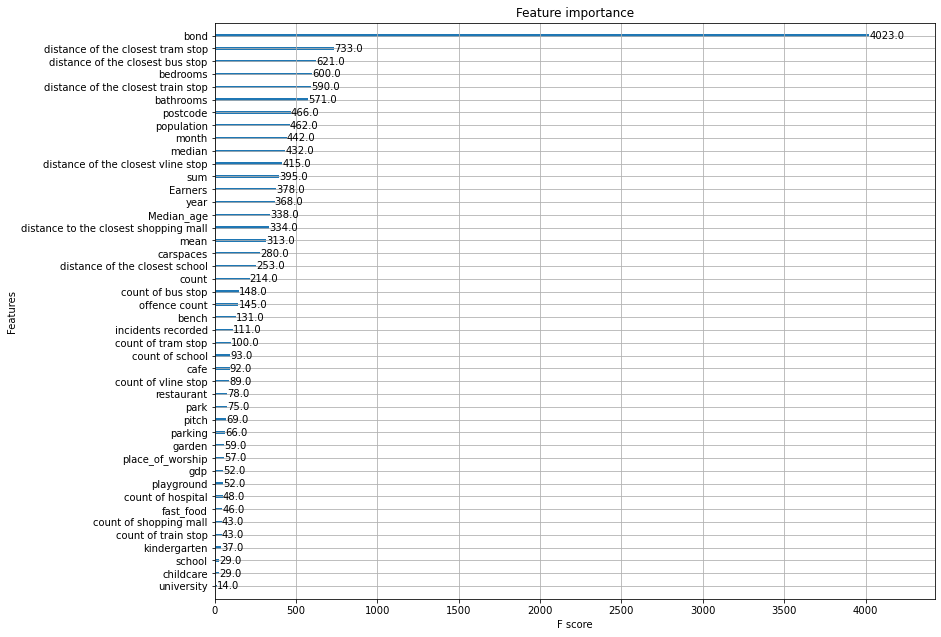

In [548]:
fig = plt.figure(figsize = (10, 8))
ax = fig.add_axes([0,0,1,1])
xgb.plot_importance(xgbc, ax)

In [565]:
df3 = pd.DataFrame()
for year in range(2023,2026):
    for month in range(1,13):
        tmp_df = df2.copy()
        year_list = [year]*len(df2)
        month_list = [month]*len(df2)
        tmp_df['year'] = year_list
        tmp_df['month'] = month_list
        df3= pd.concat([df3,tmp_df])
df3 = df3.reset_index().drop(['index','rent'],axis = 1)
df3

,bathrooms,bedrooms,carspaces,postcode,bond,distance of the closest bus stop,count of bus stop,distance of the closest train stop,count of train stop,distance of the closest tram stop,...,pitch,offence count,incidents recorded,Earners,Median_age,sum,median,mean,year,month
0,0.0,1.0,0.0,3008,5100.00,0.456268,5.0,0.422695,0.0,0.433269,...,0.0,25125.0,18185.0,12852.879346,32.000000,9.131559e+08,55302.312878,71162.931348,2023,1
1,0.0,1.0,0.0,3015,1084.00,0.370457,60.0,0.405244,2.0,0.391671,...,40.0,10604.0,8777.0,11895.330882,41.000000,1.028750e+09,72539.966775,86488.843304,2023,1
2,0.0,1.0,0.0,3053,0.00,0.449442,39.0,0.452479,0.0,0.452666,...,24.0,20238.0,15867.0,11346.820188,29.126605,7.687387e+08,39659.346275,64056.803616,2023,1
3,0.0,1.0,0.0,3079,1304.00,0.516233,48.0,0.526467,2.0,0.513719,...,42.0,9248.0,7527.0,9162.593440,41.054886,9.836557e+08,71134.720489,104102.687648,2023,1
4,0.0,1.0,0.0,3171,5000.00,0.642444,64.0,0.670534,2.0,0.629276,...,12.0,22113.0,16777.0,13687.192327,34.379807,6.136552e+08,39079.025392,44830.558563,2023,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
252391,4.0,5.0,4.0,3064,2340.00,0.386602,209.0,0.457571,2.0,0.388815,...,190.0,55237.0,41689.0,5334.640894,45.000000,3.716333e+08,56175.284965,69640.550203,2025,12
252392,4.0,5.0,4.0,3133,4460.75,0.642555,64.0,0.664932,0.0,0.645158,...,2.0,7751.0,5998.0,6718.941929,44.000000,4.447596e+08,53075.761406,66204.887553,2025,12
252393,4.0,5.0,4.0,3335,2824.00,0.129284,10.0,0.267546,0.0,0.409260,...,56.0,4762.0,3843.0,10763.212165,39.238456,6.540474e+08,55167.661340,59460.659575,2025,12
252394,4.0,5.0,4.0,3844,2518.27,1.741227,124.0,1.162162,0.0,0.669245,...,3.0,42754.0,29717.0,16029.858092,42.000000,1.079505e+09,55433.370218,67341.465293,2025,12


In [402]:
population = pd.read_csv('../data/population_forcasting.csv')
population_count = dict()
population['Postcode'] = population['Postcode'].fillna(value=0)
for index, value in population.iterrows():
    postcode = int(value['Postcode'])
    year = value['year']
    key = str(postcode)+ ' ' + str(year)
    population_count[key] = value['Total']

In [566]:
population_list = []
for index, value in df3.iterrows():
    postcode = int(value['postcode'])
    year = int(value['year'])
    key = str(postcode)+ ' ' + str(year)
    try: 
        count = population_count[key]
        population_list.append(count)
    except:
        population_list.append(None)
df3['population'] = population_list

In [567]:
df3["postcode"] = df3["postcode"].apply(lambda x: int(x))
cpi_df = pd.read_csv('../data/cpi.csv')
df3 = df3.merge(cpi_df, on = 'year', how='left')

In [568]:
df3 = df3.drop('Unnamed: 0', axis = 1)

In [406]:
f = open("../data/year_school_address.txt")
data = json.load(f)
new_school = pd.DataFrame(data, columns=['year','link','address'])
def get_postcode(add):
    add_list = add.split(' ')
    return add_list[-1]
new_school['postcode'] = new_school['address'].apply(get_postcode)

In [407]:
school_dict = {}
for index, value in new_school.iterrows():
    year = value['year']
    postcode = value['postcode']
    key = year + ' ' + postcode
    if key not in school_dict.keys():
        school_dict[key] = 1
    else:
        school_dict[key] += 1

In [569]:
for index, values in df3.iterrows():
    year = str(values['year'])
    postcode = str(values['postcode'])
    key = year + ' ' + postcode
    if key in school_dict.keys():
        school_values = values['school']
        df3.loc[index,'school'] = school_values + school_dict[key]

In [570]:
df3 = df3.merge(gdp_df, on = 'year', how='left')
df3 = df3.merge(house_count,  on = 'postcode', how = 'left').fillna(0)
df3

In [572]:
predict_std = sc.transform(df3)
rent_list = rfc.predict(predict_std)
df3['predicted_rent'] = rent_list

/Users/heyonglin/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:488: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


In [573]:
df3

,bathrooms,bedrooms,carspaces,postcode,bond,distance of the closest bus stop,count of bus stop,distance of the closest train stop,count of train stop,distance of the closest tram stop,...,sum,median,mean,year,month,population,cpi,gdp,count,predicted_rent
0,0.0,1.0,0.0,3008,5100.00,0.456268,5.0,0.422695,0.0,0.433269,...,9.131559e+08,55302.312878,71162.931348,2023,1,0.0,277.84,69717.12,4254,410.538438
1,0.0,1.0,0.0,3015,1084.00,0.370457,60.0,0.405244,2.0,0.391671,...,1.028750e+09,72539.966775,86488.843304,2023,1,29726.0,277.84,69717.12,296,310.644588
2,0.0,1.0,0.0,3053,0.00,0.449442,39.0,0.452479,0.0,0.452666,...,7.687387e+08,39659.346275,64056.803616,2023,1,0.0,277.84,69717.12,1335,286.983546
3,0.0,1.0,0.0,3079,1304.00,0.516233,48.0,0.526467,2.0,0.513719,...,9.836557e+08,71134.720489,104102.687648,2023,1,8946.0,277.84,69717.12,277,274.329240
4,0.0,1.0,0.0,3171,5000.00,0.642444,64.0,0.670534,2.0,0.629276,...,6.136552e+08,39079.025392,44830.558563,2023,1,9676.0,277.84,69717.12,170,282.837418
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
252391,4.0,5.0,4.0,3064,2340.00,0.386602,209.0,0.457571,2.0,0.388815,...,3.716333e+08,56175.284965,69640.550203,2025,12,25571.0,291.50,74353.74,1482,321.213486
252392,4.0,5.0,4.0,3133,4460.75,0.642555,64.0,0.664932,0.0,0.645158,...,4.447596e+08,53075.761406,66204.887553,2025,12,15127.0,291.50,74353.74,234,439.510930
252393,4.0,5.0,4.0,3335,2824.00,0.129284,10.0,0.267546,0.0,0.409260,...,6.540474e+08,55167.661340,59460.659575,2025,12,17873.0,291.50,74353.74,240,426.565133
252394,4.0,5.0,4.0,3844,2518.27,1.741227,124.0,1.162162,0.0,0.669245,...,1.079505e+09,55433.370218,67341.465293,2025,12,8396.0,291.50,74353.74,214,343.681211


In [574]:
df3.to_csv('../data/curated/predicted_df.csv')
df3 = pd.read_csv('../data/curated/predicted_df.csv')

In [575]:
suburb_postcode_df = pd.read_csv('../data/cleaned_complete.csv')[['postcode','surburb']].drop_duplicates()
suburb_postcode_df

,postcode,surburb
0,3205,south melbourne
47,3206,albert park
148,3207,port melbourne
246,3004,melbourne
868,3006,southbank
...,...,...
100625,3260,camperdown
100627,3700,tallangatta
100628,3701,eskdale
100629,3701,dartmouth


In [415]:
postcode_suburb_list = dict()
for index, value in suburb_postcode_df.iterrows():
    postcode = value['postcode']
    suburb = value['surburb']
    key = str(postcode)
    postcode_suburb_list[key] = suburb

In [576]:
p_list = []
for index, data in df3.iterrows():
    postcode = str(int(data['postcode']))
    p_list.append(postcode_suburb_list[postcode])
df3['suburb'] = p_list

In [578]:
df3

,Unnamed: 0,bathrooms,bedrooms,carspaces,postcode,bond,distance of the closest bus stop,count of bus stop,distance of the closest train stop,count of train stop,...,median,mean,year,month,population,cpi,gdp,count,predicted_rent,suburb
0,0,0.0,1.0,0.0,3008,5100.00,0.456268,5.0,0.422695,0.0,...,55302.312878,71162.931348,2023,1,0.0,277.84,69717.12,4254,410.538438,docklands
1,1,0.0,1.0,0.0,3015,1084.00,0.370457,60.0,0.405244,2.0,...,72539.966775,86488.843304,2023,1,29726.0,277.84,69717.12,296,310.644588,south kingsville
2,2,0.0,1.0,0.0,3053,0.00,0.449442,39.0,0.452479,0.0,...,39659.346275,64056.803616,2023,1,0.0,277.84,69717.12,1335,286.983546,carlton south
3,3,0.0,1.0,0.0,3079,1304.00,0.516233,48.0,0.526467,2.0,...,71134.720489,104102.687648,2023,1,8946.0,277.84,69717.12,277,274.329240,ivanhoe east
4,4,0.0,1.0,0.0,3171,5000.00,0.642444,64.0,0.670534,2.0,...,39079.025392,44830.558563,2023,1,9676.0,277.84,69717.12,170,282.837418,springvale
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
252391,252391,4.0,5.0,4.0,3064,2340.00,0.386602,209.0,0.457571,2.0,...,56175.284965,69640.550203,2025,12,25571.0,291.50,74353.74,1482,321.213486,donnybrook
252392,252392,4.0,5.0,4.0,3133,4460.75,0.642555,64.0,0.664932,0.0,...,53075.761406,66204.887553,2025,12,15127.0,291.50,74353.74,234,439.510930,vermont south
252393,252393,4.0,5.0,4.0,3335,2824.00,0.129284,10.0,0.267546,0.0,...,55167.661340,59460.659575,2025,12,17873.0,291.50,74353.74,240,426.565133,thornhill park
252394,252394,4.0,5.0,4.0,3844,2518.27,1.741227,124.0,1.162162,0.0,...,55433.370218,67341.465293,2025,12,8396.0,291.50,74353.74,214,343.681211,traralgon


In [579]:
df3.to_csv('../data/curated/predicted_df_combined.csv')

In [580]:
df3_combinded = pd.read_csv('../data/curated/predicted_df_combined.csv').drop(['Unnamed: 0'], axis = 1)

In [581]:
suburb_mean_rent = pd.DataFrame(df3_combinded.groupby(['year','postcode']).mean('predicted_rent')['predicted_rent']).reset_index().rename({'predicted_rent':'rent'}, axis = 1)
suburb_mean_rent

,year,postcode,rent
0,2023,3000,426.576778
1,2023,3002,413.592782
2,2023,3003,427.011118
3,2023,3004,497.810896
4,2023,3006,414.375106
...,...,...,...
1393,2025,3977,240.541090
1394,2025,3978,381.939177
1395,2025,3980,356.022348
1396,2025,3981,498.916333


In [582]:
house_file = pd.read_csv('../data/cleaned_complete.csv').drop(['Unnamed: 0','index','dateUpdated','dateListed','geoLocation','geometry', 'index_right', 'SA2_maincode_2021','Population Increase','Earners (persons)','Median age of earners (years)','Male','Female',	'Person','Male Ratio','Female Ratio','Sum ($)','Mean ($)','Median ($)','propertyTypes','price'],axis = 1)
history_rent = pd.DataFrame(house_file.groupby(['year','postcode']).mean('rent')['rent']).reset_index().rename({'surburb':'suburb'}, axis = 1)
history_rent

,year,postcode,rent
0,2019,3000,563.484793
1,2019,3002,636.024390
2,2019,3003,525.928571
3,2019,3004,600.873817
4,2019,3006,712.826054
...,...,...,...
1499,2022,3975,522.968750
1500,2022,3976,425.000000
1501,2022,3977,456.158798
1502,2022,3978,493.750000


In [583]:
combined_rent = pd.concat([history_rent, suburb_mean_rent])
combined_rent = combined_rent.sort_values(by = ['postcode','year'])
yearly_growth_list = []
for name, group in combined_rent.groupby('postcode'):   
    group['lag(rent,1)'] = group['rent'].shift(1)
    growth_dict = dict()
    growth_dict['postcode'] = name
    for index, value in group.iterrows():
        rent = value['rent']
        lag = value['lag(rent,1)']
        rate = 0
        if pd.isna(lag):
            rete = None
        else:
            rate = (rent-lag)/lag *100
        growth_dict['year'+ ' ' + str(int(value['year']))] = rate
    yearly_growth_list.append(growth_dict)


In [586]:
rate_df = pd.DataFrame(yearly_growth_list)
top_10 = rate_df.sort_values(by = ['year 2023','year 2024', 'year 2025'],ascending=False)[:10]
top_10

,postcode,year 2019,year 2020,year 2021,year 2022,year 2023,year 2024,year 2025
324,3636,NaN,NaN,0.0,-33.333333,177.997930,0.0,0.0
423,3886,0.0,NaN,NaN,NaN,170.080845,0.0,0.0
260,3390,0.0,NaN,NaN,NaN,167.854763,0.0,0.0
226,3293,0.0,-21.052632,NaN,NaN,165.045444,0.0,0.0
256,3373,0.0,NaN,NaN,NaN,144.931766,0.0,0.0
261,3396,NaN,NaN,0.0,0.000000,134.433533,0.0,0.0
349,3728,0.0,NaN,NaN,NaN,128.948402,0.0,0.0
417,3870,NaN,0.000000,NaN,NaN,119.015533,0.0,0.0
306,3566,0.0,NaN,NaN,NaN,118.724850,0.0,0.0
313,3595,NaN,0.000000,NaN,-33.823529,113.457523,0.0,0.0


In [587]:
top_10.merge(suburb_postcode_df, on = 'postcode', how = 'left')

,postcode,year 2019,year 2020,year 2021,year 2022,year 2023,year 2024,year 2025,surburb
0,3636,NaN,NaN,0.0,-33.333333,177.997930,0.0,0.0,numurkah
1,3886,0.0,NaN,NaN,NaN,170.080845,0.0,0.0,newmerella
2,3390,0.0,NaN,NaN,NaN,167.854763,0.0,0.0,murtoa
3,3293,0.0,-21.052632,NaN,NaN,165.045444,0.0,0.0,glenthompson
4,3373,0.0,NaN,NaN,NaN,144.931766,0.0,0.0,beaufort
5,3396,NaN,NaN,0.0,0.000000,134.433533,0.0,0.0,hopetoun
6,3728,0.0,NaN,NaN,NaN,128.948402,0.0,0.0,tungamah
7,3870,NaN,0.000000,NaN,NaN,119.015533,0.0,0.0,boolarra
8,3566,0.0,NaN,NaN,NaN,118.724850,0.0,0.0,gunbower
9,3595,NaN,0.000000,NaN,-33.823529,113.457523,0.0,0.0,nyah west


In [426]:
value_list = []
for index, values in house_original.iterrows():
    year = values['year']
    column_list = list(values.index)[:44]
    for i in list(values.index)[44:]:
        if str(year) in i:
            column_list.append(i)
    new_value = values[column_list]
    value_list.append(list(new_value))
file = pd.DataFrame(value_list, columns = column_list).rename({'Earners_2021':'Earners', 'Median_age_2021':'Median_age', 'sum_2021':'sum', 'median_2021':'median',	'mean_2021':'mean'}, axis = 1)
    # print(list(values))

In [434]:
file = file[file['SA2 NAME']!= 0].fillna(0)

housing cost：rent/income 0.2
travel cost：count * distance 0.2
Dining Convenience： 'cafe'，‘fast_food'，restaurant' 0.1
enviornment：  'garden','park', 'playground', 'pitch'，'bench' 0.1
education：'childcare','kindergarten','school', 'university' 0.1
safty： 'offence count', 'incidents recorded' 0.1
medical treatment：'count of hospital' 0.1
shopping： shopping mall 0.1

In [435]:
index = []
for name, group in file.groupby('surburb'):
    rent = group['rent'].median()
    median_income = group['median'].median()
    house_cost = rent/(median_income + 0.00001)
    bus = int(list(group['count of bus stop'].drop_duplicates())[0]) * group['distance of the closest bus stop'].mean()
    tram = int(list(group['count of tram stop'].drop_duplicates())[0]) * group['distance of the closest tram stop'].mean()
    train = int(list(group['count of train stop'].drop_duplicates())[0]) * group['distance of the closest train stop'].mean()
    vline = int(list(group['count of vline stop'].drop_duplicates())[0]) * group['distance of the closest vline stop'].mean()
    shopping_mall = int(list(group['count of shopping mall'].drop_duplicates())[0]) * group['distance to the closest shopping mall'].mean()
    eating = list(group['cafe'].drop_duplicates())[0] + list(group['fast_food'].drop_duplicates())[0] + list(group['restaurant'].drop_duplicates())[0]
    enviornment = list(group['garden'].drop_duplicates())[0] + list(group['park'].drop_duplicates())[0] + list(group['playground'].drop_duplicates())[0]+list(group['pitch'].drop_duplicates())[0]+list(group['place_of_worship'].drop_duplicates())[0]
    education = list(group['count of school'].drop_duplicates())[0] + list(group['childcare'].drop_duplicates())[0] + list(group['kindergarten'].drop_duplicates())[0]+list(group['university'].drop_duplicates())[0]
    safty = list(group['offence count'].drop_duplicates())[0] + list(group['incidents recorded'].drop_duplicates())[0]
    health_care = list(group['count of hospital'].drop_duplicates())[0]
    livable_index = house_cost * 0.2 + (bus+tram+train+vline) * 0.2 + shopping_mall* 0.05 + eating*0.05 + education*0.1+ enviornment*0.2 + health_care*0.1 + safty*0.1
    index.append([name,livable_index])
index_df = pd.DataFrame(index, columns=['suburb','index'])


In [436]:
rank = index_df.sort_values(by = 'index', ascending=False)
rank

,suburb,index
522,west melbourne,8.201847e+06
142,dandenong north,1.798699e+04
143,dandenong south,1.798661e+04
141,dandenong,1.798661e+04
208,frankston,1.435652e+04
...,...,...
145,dartmouth,5.380735e+01
186,eskdale,5.379380e+01
401,penshurst,5.130438e+01
213,gerrigerrup,5.120359e+01


In [ ]:
distance_list_6 = []
for i in range(82000,84000):
    print(i)
    if math.isnan(house_df_combined['longitude'][i]) is True:
        distance_list_6.append(None)
    else:
        coords = ((144.961602,-37.813937),(house_df_combined['longitude'][i],house_df_combined['latitude'][i]))
        client = openrouteservice.Client(key='5b3ce3597851110001cf6248657828fe229a469ab33cc9fb93d4d87d') 
        routes = client.directions(coords, profile='driving-car', optimize_waypoints=True, radiuses = 1000)
        distance = routes['routes'][0]['summary']['distance']
        print(distance)
        distance_list_6.append(distance)

In [377]:
import pandas as pd
import openrouteservice
import math
house_df_combined = pd.read_csv('../data/house_combined.csv')
import ast
lat_list = []
long_list = []
for i in range(len(house_df_combined)):
    if pd.isnull(house_df_combined.geoLocation[i]):
        lat_list.append(None)
        long_list.append(None)
    else:
        latitude = ast.literal_eval(house_df_combined.geoLocation[i])['latitude']
        longitude = ast.literal_eval(house_df_combined.geoLocation[i])['longitude']
        lat_list.append(latitude)
        long_list.append(longitude)
house_df_combined['latitude'] = lat_list
house_df_combined['longitude'] = long_list

In [379]:
distance_list_7 = []
for i in range(83677,84000):
    print(i)
    if math.isnan(house_df_combined['longitude'][i]) is True:
        distance_list_7.append(None)
    else:
        coords = ((144.961602,-37.813937),(house_df_combined['longitude'][i],house_df_combined['latitude'][i]))
        client = openrouteservice.Client(key='5b3ce3597851110001cf624862333fa6b6b045c1b2c7ec1dc27158c5') 
        routes = client.directions(coords, profile='driving-car', optimize_waypoints=True, radiuses = 1000)
        distance = routes['routes'][0]['summary']['distance']
        print(distance)
        distance_list_7.append(distance)

83677
4576.0
83678
3419.1
83679
9231.1
83680
3174.8
83681
3151.1
83682
16542.7
83683
3330.6
83684
6089.0
83685
5529.2
83686
3151.1
83687
3419.1
83688
3419.1
83689
3081.4
83690
3151.1
83691
3081.4
83692
3195.2
83693
3174.8
83694
3419.1
83695
3151.1
83696
5153.0
83697
5249.7
83698
3419.1
83699
1205.8
83700
3054.1
83701
3081.4
83702
5181.1
83703
3174.8
83704
3419.1
83705
10926.5
83706
3178.3
83707
3178.3
83708
1671.9
83709
5555.6
83710
3081.4
83711
3081.4
83712
29799.8
83713
3419.1
83714
3181.1
83715
5642.7
83716
2977.1
83717


/Users/heyonglin/opt/anaconda3/lib/python3.9/site-packages/openrouteservice/client.py:211: UserWarning: Rate limit exceeded. Retrying for the 1st time.
  warnings.warn('Rate limit exceeded. Retrying for the {0}{1} time.'.format(retry_counter + 1,
/Users/heyonglin/opt/anaconda3/lib/python3.9/site-packages/openrouteservice/client.py:211: UserWarning: Rate limit exceeded. Retrying for the 2nd time.
  warnings.warn('Rate limit exceeded. Retrying for the {0}{1} time.'.format(retry_counter + 1,
/Users/heyonglin/opt/anaconda3/lib/python3.9/site-packages/openrouteservice/client.py:211: UserWarning: Rate limit exceeded. Retrying for the 3rd time.
  warnings.warn('Rate limit exceeded. Retrying for the {0}{1} time.'.format(retry_counter + 1,
/Users/heyonglin/opt/anaconda3/lib/python3.9/site-packages/openrouteservice/client.py:211: UserWarning: Rate limit exceeded. Retrying for the 4th time.
  warnings.warn('Rate limit exceeded. Retrying for the {0}{1} time.'.format(retry_counter + 1,
/Users/heyon

3174.8
83718
9349.2
83719
3149.0
83720
47277.2
83721
3195.2
83722
3941.1
83723
3181.1
83724
14908.9
83725
3419.1
83726
3262.5
83727
3262.5
83728
3262.5
83729
3262.5
83730
3262.5
83731
3262.5
83732
3262.5
83733
3178.9
83734
3330.6
83735
3054.1
83736
3419.1
83737
3419.1
83738
3262.5
83739
3419.1
83740
19018.2
83741
3156.6
83742
3178.3
83743
3151.1
83744
3419.1
83745
3419.1
83746
3054.1
83747
3095.6
83748
3419.1
83749
3419.1
83750
3151.1
83751
3178.3
83752
3178.3
83753
4557.6
83754
3419.1
83755
3178.3
83756
6834.9
83757
3419.1
83758
3419.1
83759
6063.3
83760
3419.1
83761
3075.8
83762
3178.3
83763
34265.5
83764
3178.3
83765
5934.0
83766
5535.6
83767
5629.7
83768
11396.3
83769
12162.6
83770
3941.1
83771


KeyboardInterrupt: 